<a href="https://colab.research.google.com/github/zszazi/MSD/blob/master/SIFT_feature_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIFT (Scale-Invariant Feature Transform) - Feature matching

Because SIFT Algo is not available in opencv as its patented but its present in opencv_contrib-python,hence we pip install the same

In [57]:
!pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

In [0]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

## Make sure to change the uploaded image and crop name

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sift_crop.jpg to sift_crop.jpg
Saving sift_image.jpg to sift_image.jpg
User uploaded file "sift_crop.jpg" with length 3761 bytes
User uploaded file "sift_image.jpg" with length 67621 bytes


-----------------------IMAGE-----------------------


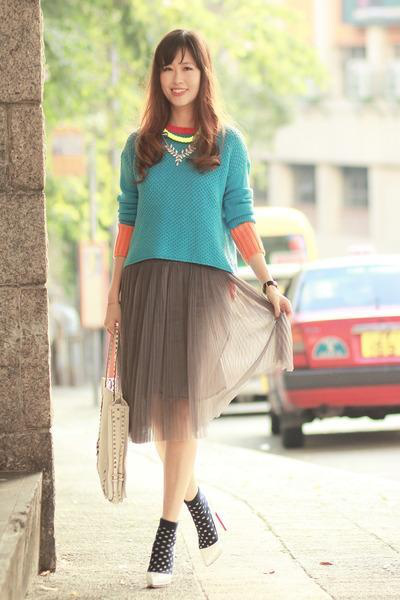


-----------------------TEMPLATE-----------------------


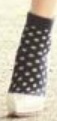

In [59]:
img = cv2.imread('sift_image.jpg',1)

template = cv2.imread('sift_crop.jpg',1)


print('-----------------------IMAGE-----------------------')
cv2_imshow(img)

print('\n-----------------------TEMPLATE-----------------------')
cv2_imshow(template)

initiate SIFT detector

In [0]:
sift = cv2.xfeatures2d.SIFT_create()

In [0]:
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(template,None)

In [0]:
# BF(brute force)Matcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [0]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])

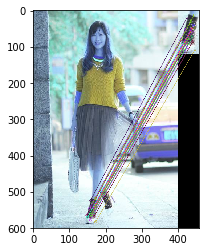

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


In [65]:

img3 = cv2.drawMatchesKnn(img,kp1,template,kp2,good,None,flags=2)
plt.imshow(img3)
plt.show()

%time

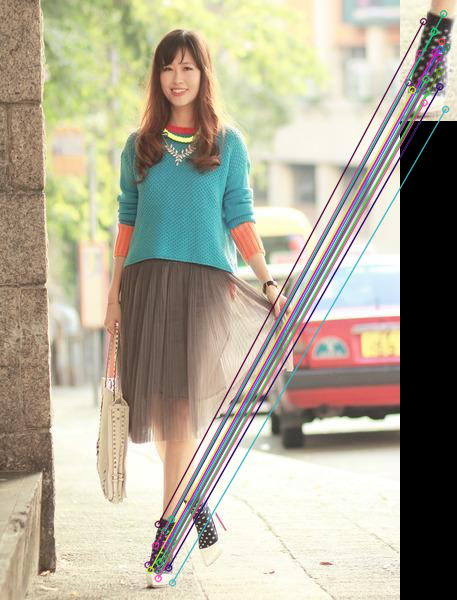

In [66]:
cv2_imshow(img3)

# Now lets rotate the template image by 90 degree and run SIFT on it,
This is better than template matching of opencv because template matching can do adjustments only upto 10 degree

In [30]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sift_crop_rotate_90degree.jpg to sift_crop_rotate_90degree.jpg
User uploaded file "sift_crop_rotate_90degree.jpg" with length 3750 bytes


### Make sure to change the name of the uploaded image in the img and template_rotate  variables

-----------------------IMAGE-----------------------


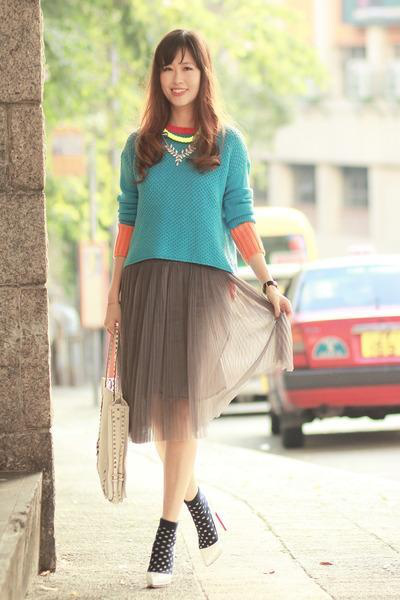


-----------------------TEMPLATE ROTATED BY 90 Degree-----------------------


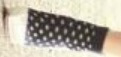

In [67]:
img = cv2.imread('sift_image.jpg',1)

template_rotate= cv2.imread('sift_crop_rotate_90degree.jpg',1)


print('-----------------------IMAGE-----------------------')
cv2_imshow(img)

print('\n-----------------------TEMPLATE ROTATED BY 90 Degree-----------------------')
cv2_imshow(template_rotate)

In [0]:
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(template_rotate,None)

In [0]:

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [0]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])

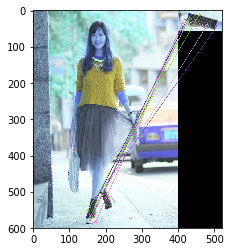

In [76]:
res2 = cv2.drawMatchesKnn(img,kp1,template_rotate,kp2,good,None,flags=2)
plt.imshow(res2)
plt.show()

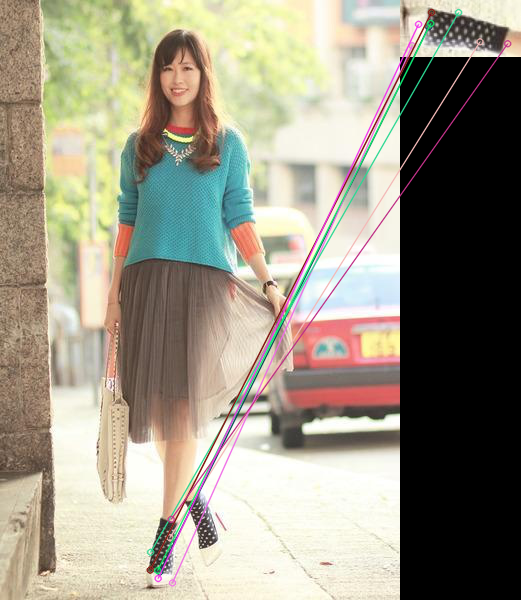

In [77]:
cv2_imshow(res2)

## We can clearly see that even though the image template has been rotated yet it captured the match in the image, although the back leg has not been matched

## The above undetected back leg can be solved by increasing the threshold although the noise make it indistinguishable

In [0]:
good1 = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good1.append([m])


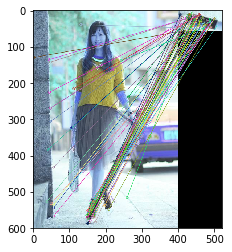

In [88]:
res3 = cv2.drawMatchesKnn(img,kp1,template_rotate,kp2,good1,None,flags=2)
plt.imshow(res3)
plt.show()

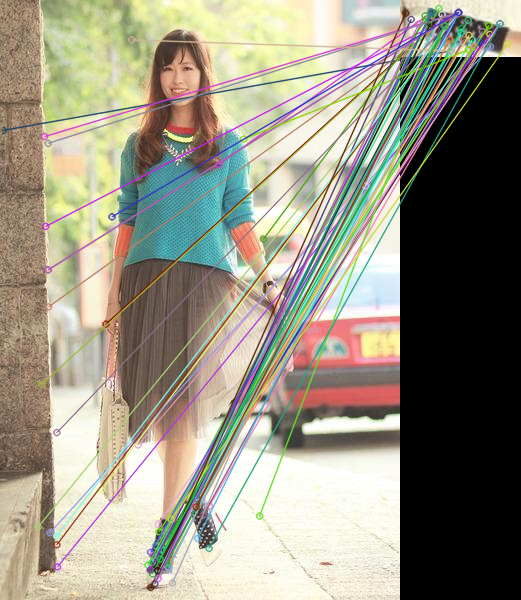

In [89]:
cv2_imshow(res3)

## In the above image we can see that both the front and back leg is detected along with some noise and FP points